In [2]:
import tools.file as tf
import drawwithplt as Dplt
Dplt.plt.style.use(["science","grid"])

In [3]:
def plot_sa_data(temp_data_list):
    # 提取数据
    temperatures = [data['temperature'] for data in temp_data_list]
    Hqs = [data['current_h_list']['Hq'] for data in temp_data_list]
    Hds = [data['current_h_list']['Hd'] for data in temp_data_list]
    Hws = [data['current_h_list']['Hw'] for data in temp_data_list]
    total_Hs = [data['current_energy'] for data in temp_data_list]

    # 计算每种能量占总能量的百分比
    Hq_percentage = [100 * Hq / total_H for Hq, total_H in zip(Hqs, total_Hs)]
    Hd_percentage = [100 * Hd / total_H for Hd, total_H in zip(Hds, total_Hs)]
    Hw_percentage = [100 * Hw / total_H for Hw, total_H in zip(Hws, total_Hs)]

    # 设置图形
    fig, ax1 = Dplt.SetSubFig(1,1,(5,3))

    # 左纵轴绘制总能量，并使用对数坐标
    ax1.set_xlabel('Temperature (log scale)')
    ax1.set_ylabel('Total Energy (log scale)', color='black')
    ax1.plot(temperatures, total_Hs, '.-', color='black', label="Total H")
    # ax1.set_ylim(2000,50000)
    ax1.set_xscale('log')
    # ax1.set_yscale('log')
    ax1.tick_params(axis='y', labelcolor='black')

    # 创建与ax1共享x轴的第二个坐标系
    ax2 = ax1.twinx()

    # 右纵轴绘制能量百分比
    alpha = 0.8
    ax2.set_ylabel('Energy Percentage', color='blue')
    ax2.plot(temperatures, Hq_percentage, '-', color='blue', label="Hq", alpha=alpha)
    ax2.plot(temperatures, Hd_percentage, '-', color='green', label="Hd", alpha=alpha)
    ax2.plot(temperatures, Hw_percentage, '-', color='red', label="Hw", alpha=alpha)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # 总能量的图例放在左上角，其余放在图的外部
    ax1.legend(loc='center left', framealpha=0.5)
    ax2.legend(loc='center right', framealpha=0.5)

    Dplt.plt.tight_layout()  # 确保图例和标签不会重叠

def plot_sb_data(sb_data_list):
    # 提取数据
    iterations = [data['iteration'] for data in sb_data_list]
    Hqs = [data['current_h_list']['Hq'] for data in sb_data_list]
    Hds = [data['current_h_list']['Hd'] for data in sb_data_list]
    Hws = [data['current_h_list']['Hw'] for data in sb_data_list]
    total_Hs = [data['current_energy'] for data in sb_data_list]

    # 计算每种能量占总能量的百分比
    Hq_percentage = [100 * Hq / total_H for Hq, total_H in zip(Hqs, total_Hs)]
    Hd_percentage = [100 * Hd / total_H for Hd, total_H in zip(Hds, total_Hs)]
    Hw_percentage = [100 * Hw / total_H for Hw, total_H in zip(Hws, total_Hs)]

    # 设置图形
    fig, ax1 = Dplt.SetSubFig(1, 1, (5, 3))

    # 左纵轴绘制总能量
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Total Energy', color='black')
    ax1.plot(iterations, total_Hs, '.-', color='black', label="Total H")
    ax1.tick_params(axis='y', labelcolor='black')

    # 创建与ax1共享x轴的第二个坐标系
    ax2 = ax1.twinx()

    # 右纵轴绘制能量百分比
    alpha = 0.8
    ax2.set_ylabel('Energy Percentage', color='blue')
    ax2.plot(iterations, Hq_percentage, '-', color='blue', label="Hq", alpha=alpha)
    ax2.plot(iterations, Hd_percentage, '-', color='green', label="Hd", alpha=alpha)
    ax2.plot(iterations, Hw_percentage, '-', color='red', label="Hw", alpha=alpha)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # 总能量的图例放在左上角，其余放在图的外部
    ax1.legend(loc='center left', framealpha=0.5)
    ax2.legend(loc='center right', framealpha=0.5)

    Dplt.plt.tight_layout()  # 确保图例和标签不会重叠


In [4]:
def plot_matrices(matrix1, matrix2):
    fig, ax = Dplt.plt.subplots(1, 2, figsize=(5, 3))
    
    # Plot matrix 1
    ax[0].imshow(matrix1, cmap='gray')
    ax[0].set_title('Matrix 1')
    ax[0].axis('off')
    
    # Plot matrix 2
    ax[1].imshow(matrix2, cmap='gray')
    ax[1].set_title('Matrix 2')
    ax[1].axis('off')

In [5]:
import numpy as np

def plot_benchmark(timeSAlist, timeSBlist):
    # 获取x轴的数据，即N的大小
    x = np.arange(2, timeSAlist.shape[1] + 2)**2

    # 计算均值、最大值和最小值
    meanSA = np.mean(timeSAlist, axis=0)
    maxSA = np.max(timeSAlist, axis=0)
    minSA = np.min(timeSAlist, axis=0)

    meanSB = np.mean(timeSBlist, axis=0)
    maxSB = np.max(timeSBlist, axis=0)
    minSB = np.min(timeSBlist, axis=0)

    # 拟合t=a*N^b
    coeffSA = np.polyfit(np.log(x), np.log(meanSA), 1)
    coeffSB = np.polyfit(np.log(x), np.log(meanSB), 1)
    extended_x = np.logspace(np.log10(1), np.log10(100), 400)  # 扩展x范围
    fitSA = np.exp(coeffSA[1]) * extended_x**coeffSA[0]
    fitSB = np.exp(coeffSB[1]) * extended_x**coeffSB[0]

    # 绘制图形
    fig, ax = Dplt.SetSubFig(1,1,size=(3, 4))
    ax.plot(extended_x, fitSA, 'b--', label=r'Fit:$%.2f \times N^{%.2f}$'%(coeffSA[1],coeffSA[0]))
    ax.plot(extended_x, fitSB, 'r--', label=r'Fit:$%.2f \times N^{%.2f}$'%(coeffSB[1],coeffSB[0]))
    ax.errorbar(x, meanSA, yerr=[meanSA-minSA, maxSA-meanSA], fmt='o', capsize=5, label=f'SA', color='blue')
    ax.errorbar(x, meanSB, yerr=[meanSB-minSB, maxSB-meanSB], fmt='o', capsize=5, label=f'SB', color='red')

    # 设置对数坐标轴和图例、标题、坐标轴标签
    ax.set_xscale('log')
    ax.set_yscale('log')

    # 设置y轴范围为0.005-500，并在整十的次方处标注刻度
    ax.set_ylim(0.005, 500)
    ax.set_yticks([0.01, 0.1, 1, 10, 100])
    ax.set_yticklabels(["$10^{%d}$" % np.log10(i) for i in [0.01, 0.1, 1, 10, 100]])

    # 设置x轴范围为1-100，同样在整10的次方处标注刻度
    ax.set_xlim(1, 100)
    ax.set_xticks([1, 10, 100])
    ax.set_xticklabels(["$10^{%d}$" % np.log10(i) for i in [1, 10, 100]])

    ax.legend()
    ax.set_xlabel('N')
    ax.set_ylabel('Time (s)')


In [31]:
from drawwithplt import plt

def plot_combined_data(eta_data_list):
    fig, axs = plt.subplots(len(eta_data_list), 1, figsize=(3, 1.5 * len(eta_data_list)), sharex=True)

    eta_ex = -3

    # 如果只有一组数据，确保axs是一个列表
    if len(eta_data_list) == 1:
        axs = [axs]

    for idx, data_list in enumerate(eta_data_list):
        # 提取SA的数据
        sa_data = data_list[0]
        sa_temperatures = [1 / data['temperature'] for data in sa_data]
        sa_total_Hs = [data['current_energy'] for data in sa_data]

        # 提取SB的数据
        sb_data = data_list[1]
        sb_iterations = [data['iteration'] for data in sb_data]
        sb_total_Hs = [data['current_energy'] for data in sb_data]

        # 绘制SA数据
        axs[idx].plot(sa_temperatures, sa_total_Hs, '-.', label="SA Total H")
        axs[idx].set_xscale('log')
        
        axs[idx].xaxis.grid(False)  # 隐藏x轴的网格线
        axs[idx].yaxis.grid(which='both', linestyle='--')

        if idx == len(eta_data_list) - 1:
            axs[idx].set_xlabel('1/Temperature for SA')
        axs[idx].set_ylabel('$H$ ($\eta=10^{%d}$)'%eta_ex, rotation=90, labelpad=5, y=0.5)
        
        # 绘制SB数据
        ax2 = axs[idx].twiny()
        ax2.plot(sb_iterations, sb_total_Hs, '--', label="SB Total H")
        ax2.set_xscale('log')
        ax2.xaxis.grid(False)  # 隐藏x轴的网格线
        ax2.set_xticks([10**0, 10**1, 10**2, 10**3])  # 设置x轴刻度为 10^0, 10^1, 10^2, 10^3
        
        if idx == 0:
            ax2.set_xlabel('Iteration for SB')
        
        # 只有顶部子图显示上方的横轴
        ax2.xaxis.set_visible(idx == 0)
        
        axs[idx].tick_params(axis='x', which='both', pad=6)  # 调整SA数据的x轴刻度距离
        ax2.tick_params(axis='x', which='both', pad=1)       # 调整SB数据的x轴刻度距离

        handles, labels = axs[idx].get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        axs[idx].legend(handles + handles2, labels + labels2, loc='upper right', framealpha=0.5)

        eta_ex += 2

    # 设置子图间的纵间距为0
    plt.subplots_adjust(hspace=0)
    plt.tight_layout(pad=0)

def GetEnergyList():
    datalist = []
    for eta_ex in range(-3,4,2):
        tmpdataSA = tf.Load_data("Result/EnergyReview/test_result_SA_eta(10)%d.pkl"%eta_ex)
        tmpdataSB = tf.Load_data("Result/EnergyReview/test_result_SB_eta(10)%d.pkl"%eta_ex)
        datalist.append([tmpdataSA,tmpdataSB])
    return datalist


# 绘制数据

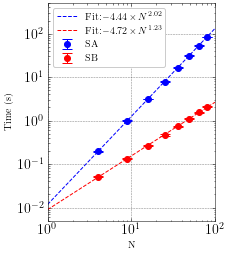

In [29]:
data = tf.Load_data("Result/Benchmark/test_time.pkl")
plot_benchmark(data[0], data[1])
Dplt.SaveFig(1,"Benchmark.png","Figure/")

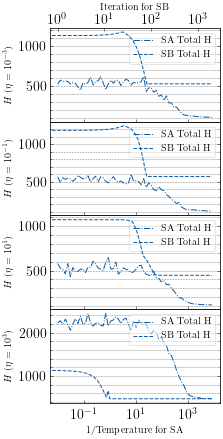

In [32]:
plot_combined_data(eta_data_list=GetEnergyList())
Dplt.SaveFig(1,"Energy_eta.png","Figure/")

c:\Users\LIFTES-NONET\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:41: UserWarning: AutoMinorLocator does not work with logarithmic scale


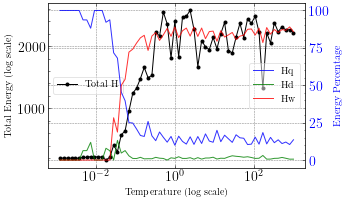

In [74]:
# 使用方法
data = tf.Load_data("Result/SA/test_result.pkl")
plot_sa_data(data)
Dplt.SaveFig(1,"minH.png","Figure/TestSA/")

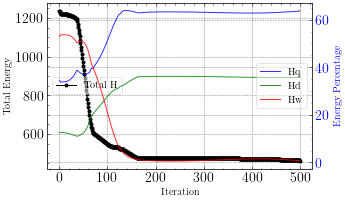

In [83]:
data = tf.Load_data("Result/SB/test_result.pkl")
plot_sb_data(data)
Dplt.SaveFig(1,"minH_wave.png","Figure/TestSB/")

In [78]:
data = tf.Load_data("Result/SB/test_result_X.pkl")
plot_matrices(data[0], data[1])

In [82]:
data[0][:,9]

array([-1., -1., -1., -1.])

In [79]:
data[0]-data[1]

array([[ 0., -2.,  0., ...,  0., -2.,  0.],
       [-2., -2., -2., ...,  0.,  0., -2.],
       [ 0., -2.,  0., ...,  0.,  0.,  0.],
       [-2., -2.,  0., ...,  0., -2., -2.]])